In [4]:
import numpy as np
import pandas as pd


In [12]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
#univariate analysis-1)summary statistics


In [14]:
df['Balance'].mean()


76485.889288

In [15]:
df['Age'].median()


37.0

In [16]:
df['CreditScore'].std()

96.65329873613035

In [ ]:
#2)Create frequency table

In [17]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

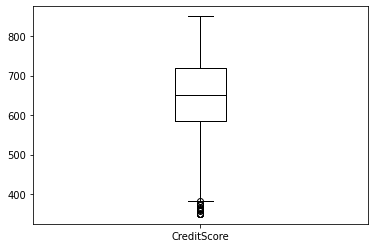

In [18]:
#3)create charts
import matplotlib.pyplot as plt
df.boxplot(column=['CreditScore'],grid=False, color='black')

Text(0, 0.5, 'CreditScore')

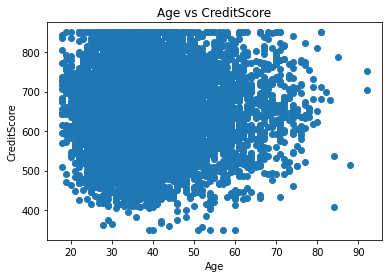

In [19]:
#Bivariate analysis-
#1)Scatterplots
import matplotlib.pyplot as plt
plt.scatter(df.Age,df.CreditScore)
plt.title('Age vs CreditScore')
plt.xlabel('Age')
plt.ylabel('CreditScore')

In [20]:
#2)Correlation Coefficients
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [13]:
#3)Simple Linear Regressiion
import statsmodels.api as sm
y=df['CreditScore']
x=df[['Age']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1572
Date:                Mon, 03 Oct 2022   Prob (F-statistic):              0.692
Time:                        06:05:58   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        651.9510      3.715    175.481      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
#Descriptive Analysis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [22]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [23]:
df.sum()

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object

In [25]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [24]:
#Handle the Missing values.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


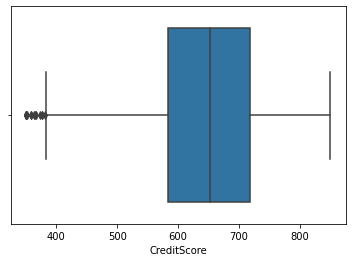

In [27]:
#there are no missing values in the given dataset
import seaborn as sns
sns.boxplot(df['CreditScore'])

In [28]:
np.where(df['CreditScore']<400)

(array([   7,  942, 1193, 1201, 1405, 1631, 1838, 1962, 2473, 2579, 5285,
        5494, 6253, 8154, 8723, 8762, 9210, 9356, 9624]),)

In [29]:
df['CreditScore'].mean()

650.5288

In [30]:
df['CreditScore']=np.where(df['CreditScore']<400,650.5288,df['CreditScore'])
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0000,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0000,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0000,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0000,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0000,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645.0000,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822.0000,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,650.5288,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501.0000,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684.0000,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
#boxplot after identifying and replacing the outliers with the mean value of the column 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


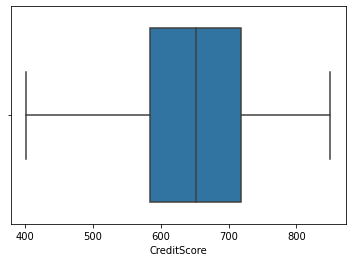

In [31]:
sns.boxplot(df['CreditScore'])

In [32]:
#Check for Categorical columns and perform encoding.
df_categorical=df[['Geography','Gender']]
df['Gender'].unique()
#two unique values

array(['Female', 'Male'], dtype=object)

In [33]:
df['Geography'].unique()
#three unique values

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
#encoding categorical values with two distinct values
from sklearn.preprocessing import LabelEncoder
en_gen = LabelEncoder()

In [36]:
en_gen.fit(df_categorical['Gender'])
LabelEncoder()
values_gen=en_gen.transform(df_categorical['Gender'])
"After encoding",values_gen

('After encoding', array([0, 0, 0, ..., 0, 1, 0]))

In [37]:
#encoding categorical values with more than two distinct values
from sklearn.preprocessing import OneHotEncoder
import numpy as np
geo_encoder = OneHotEncoder()
geo_reshaped = np.array(df_categorical['Geography']).reshape(-1, 1)
geo_values = geo_encoder.fit_transform(geo_reshaped)
print(geo_values.toarray())
print()
print(geo_encoder.inverse_transform(geo_values))


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]

[['France']
 ['Spain']
 ['France']
 ...
 ['France']
 ['Germany']
 ['France']]


In [39]:
#independent variable
X = df.iloc[:, :-1].values
print(X)


[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [40]:

#dependent variable
Y = df.iloc[:,-1].values
print(Y)

[1 0 1 ... 1 1 0]


In [41]:
#Scale the independent variables
X = df[["CreditScore", "Age", "Tenure", "EstimatedSalary"]].values
y=df[["Exited"]]
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaler.fit(X)
X

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, 3.8190780e+04]])

In [43]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=10)


In [44]:
xtrain.shape,xtest.shape


((7000, 4), (3000, 4))

In [45]:
ytrain.shape,ytest.shape

((7000,), (3000,))